# Graduate Admissions
Predicting admission from important parameters

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. 
The predicted output gives them a fair idea about their chances for a particular university.

בחירת נושא: 
ניבוי אחוז קבלה לאוניברסיטאות ע"פ מדדים נומריים

בחירת הנתונים:
הנתונים נלקחו מKAGGLE, 500 תצפיות, בוצע שימוש בכל השדות

אפיון הבעיה:
מספר דרכים למדל את הפרויקט. רגרסיה ליניארית(מאחר וכל הערכים נומרים) נראית כמו הדרך הסבירה ביותר 


overall scoreLR 0.8197572392428367 Absolute ErrorLR 0.04134076953859528
overall scoreS 0.84 Absoulot Error SVM 0.16
overall scoreRT 0.832 Absoulot Error RT 0.168
overall scoreKNN 0.768 Absolute Error 0.232


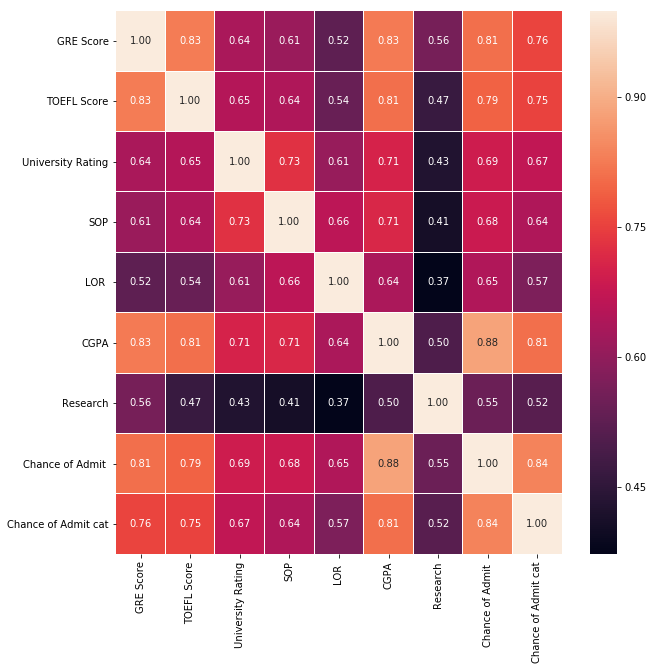

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from yellowbrick.classifier import ClassificationReport
import sys
import seaborn as sns
from sklearn.svm import SVC
from IPython.display import Image

alg = LinearRegression()
tbl = pd.read_csv("C:/Users/noam.b/PycharmProjects/Final Project/Admission_Predict_Ver1.1.csv",index_col="Serial No.")
np.random.seed(1)

# optimizing the numbers to int which is a bit easier to work with- improve SVM from 0.8 to 0.84!!! but decrease KNN from 0.8 to 0.76
tbl['GRE Score']=tbl['GRE Score']/100
tbl['TOEFL Score']=tbl['TOEFL Score']/100

# tbl['Chance of Admit ']=tbl['Chance of Admit '].astype(int)
X = tbl.drop(["Chance of Admit ",
              "TOEFL Score"],axis=1)
Y = tbl[["Chance of Admit "]]
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

X_train, X_test, Y_train, Y_test =train_test_split(X, Y)

#Removing TOEFL Score(0.8 correlation with CPGA and GRE) after the correlation improve the score from 0.8117 to 0.819

alg.fit(X_train,Y_train)
my_y_per=alg.predict(X_test)


scoreLRg= alg.score(X_test, Y_test)
et=mean_absolute_error(Y_test,my_y_per)
print("overall scoreLR", scoreLRg,\
      "Absolute ErrorLR",et)

algS=SVC(gamma="auto")
# Transforming the Y into Classification from Float
new_column = []
for index, row in tbl.iterrows():
    if row["Chance of Admit "] < 0.75:
        new_column.append(1)
    elif row['Chance of Admit ']>= 0.75 and row['Chance of Admit '] < 0.90:
        new_column.append(2)
    else:
        new_column.append(3)

tbl['Chance of Admit cat'] = new_column

# "Heat map for X Corr "
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tbl.corr(), ax=ax, annot=True, linewidths=0.2, fmt= '.2f')

X = tbl.drop(["Chance of Admit ",'Chance of Admit cat'],axis=1)
Ys = tbl['Chance of Admit cat']



X_trainS, X_testS, Y_trainS, Y_testS =train_test_split(X, Ys)
algS.fit(X_trainS,Y_trainS)
my_y_perS=algS.predict(X_testS)
scoreSVM = algS.score(X_testS, Y_testS)
etS=mean_absolute_error(Y_testS,my_y_perS)
print("overall scoreS", scoreSVM,\
      "Absoulot Error SVM",etS)

algRT = RandomForestClassifier(n_estimators=10)
algRT.fit(X_trainS,Y_trainS)
my_y_perRT=algRT.predict(X_testS)
scoreRFC = algRT.score(X_testS, Y_testS)
etRT=mean_absolute_error(Y_testS,my_y_perRT)
print("overall scoreRT", scoreRFC,\
      "Absoulot Error RT",etRT)

algKN=KNeighborsClassifier()
algKN.fit(X_trainS,Y_trainS)
my_y_perKN=algKN.predict(X_testS)
scoreKNN = algKN.score(X_testS, Y_testS)
etKN=mean_absolute_error(Y_testS,my_y_perKN)
print("overall scoreKNN", scoreKNN,\
      "Absolute Error",etKN)

Text(0, 0.5, 'Score')

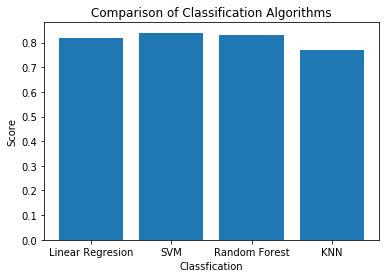

In [3]:
# comparing the different models:
Yf=np.array([scoreLRg,scoreSVM,scoreRFC,scoreKNN])
Xf=["Linear Regresion","SVM","Random Forest","KNN"]
plt.bar(Xf,Yf,)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")

Confusion matrix, without normalization
[[64 12  0]
 [ 8 19  5]
 [ 0  4 13]]
Normalized confusion matrix
[[0.84210526 0.15789474 0.        ]
 [0.25       0.59375    0.15625   ]
 [0.         0.23529412 0.76470588]]
Confusion matrix, without normalization
[[68  8  0]
 [ 9 23  0]
 [ 0  4 13]]
Normalized confusion matrix
[[0.89473684 0.10526316 0.        ]
 [0.28125    0.71875    0.        ]
 [0.         0.23529412 0.76470588]]


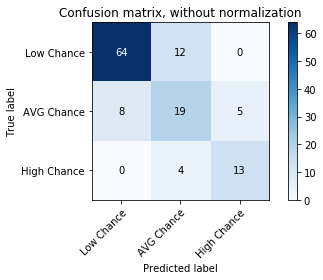

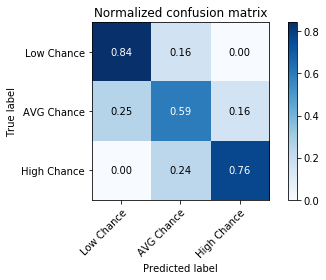

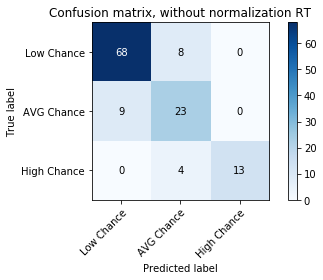

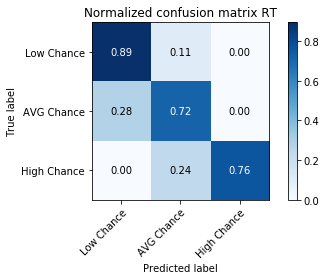

In [4]:
# A confusion matrix is a table that is often used to describe the performance of a classification model

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Y_testS, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[0]),
           yticks=np.arange(cm.shape[1]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = ["Low Chance","AVG Chance","High Chance"]

plot_confusion_matrix(Y_testS, my_y_perKN, classes=class_names,
                     title='Confusion matrix, without normalization')

plot_confusion_matrix(Y_testS, my_y_perKN, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plot_confusion_matrix(Y_testS, my_y_perRT, classes=class_names,
                      title='Confusion matrix, without normalization RT')


plot_confusion_matrix(Y_testS, my_y_perRT, classes=class_names, normalize=True,
                      title='Normalized confusion matrix RT')

# Classification Report- 
Describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
Precision: When it predicts yes, how often is it correct? TP/predicted
True Positive Rate: also known as "Sensitivity" or "Recall" When it's yes, how often does it predict yes? TP/actual
f1 score-mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

              precision    recall  f1-score   support

  Low Chance       0.89      0.84      0.86        76
  AVG Chance       0.54      0.59      0.57        32
 High Chance       0.72      0.76      0.74        17

   micro avg       0.77      0.77      0.77       125
   macro avg       0.72      0.73      0.72       125
weighted avg       0.78      0.77      0.77       125



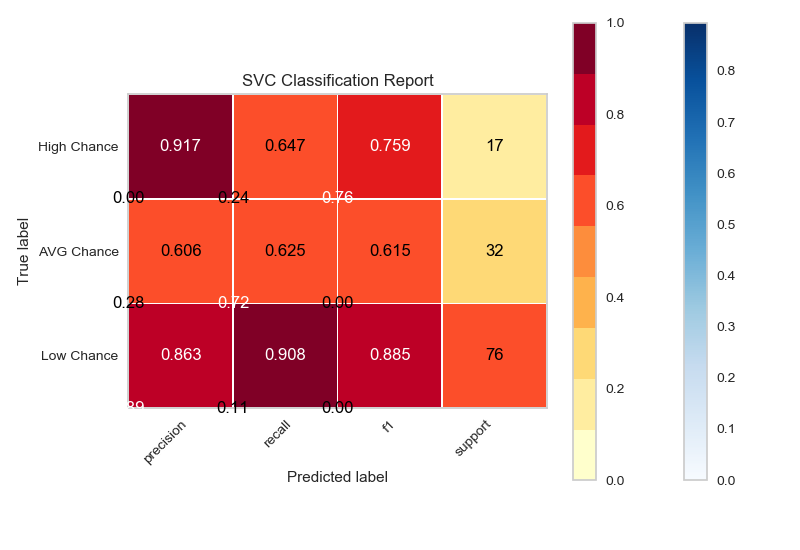

In [5]:

print(classification_report(Y_testS, my_y_perKN,target_names=class_names))
Image(filename="C:/Users/noam.b/Desktop/1.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240BCAFEA20>,
      dtype=object)

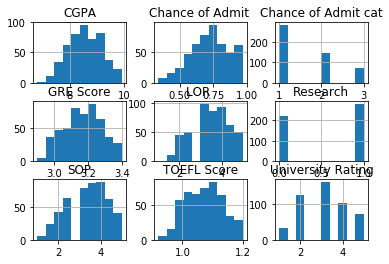

In [6]:
tbl.hist()


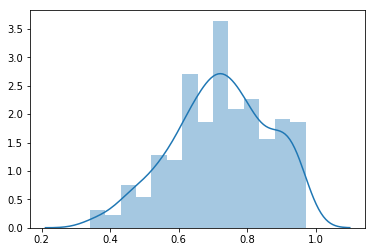

In [7]:
sns.distplot(Y, kde=True, norm_hist=True)

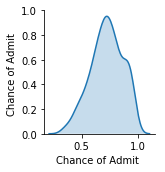

In [8]:
sns.pairplot(tbl[["Chance of Admit "]],diag_kind="kde")

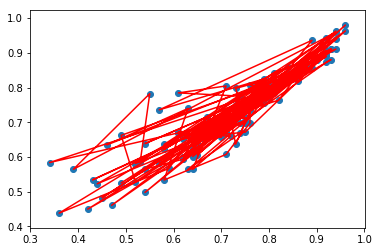

In [9]:
plt.scatter(Y_test,my_y_per)
plt.plot(Y_test,my_y_per, color='red')

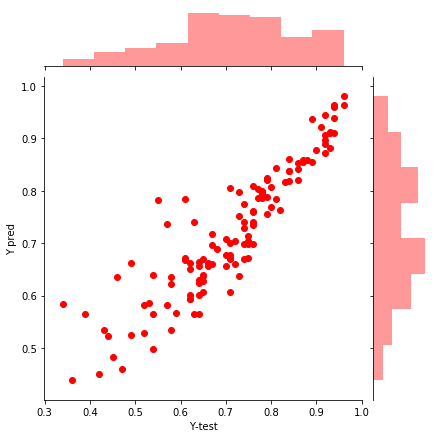

In [10]:
sns.jointplot(Y_test,my_y_per,color="r").set_axis_labels("Y-test", "Y pred")